In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import numpy as np
import matplotlib.pyplot as plt

# Get center

## get_geometric_center

In [3]:
molecular_system = msm.systems['pentalanine']['traj_pentalanine.h5']
molecular_system = msm.convert(molecular_system, to_form='molsysmt.MolSys')

In [4]:
center = msm.structure.get_center(molecular_system)

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


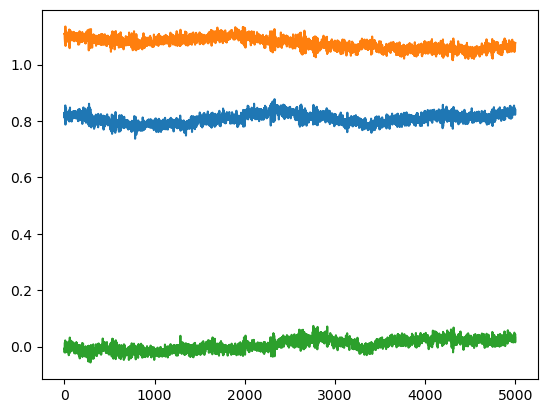

In [5]:
plt.plot(center[:,0,0])
plt.plot(center[:,0,1])
plt.plot(center[:,0,2])
plt.show()

In [6]:
center_group_0 = msm.structure.get_center(molecular_system, selection='group_index==0')
center_group_1 = msm.structure.get_center(molecular_system, selection='group_index==1')
distance_groups = msm.structure.get_distances(center_group_0, molecular_system_2=center_group_1)

In [7]:
distance_groups_2 = msm.structure.get_distances(molecular_system, selection='group_index==0', center_of_atoms=True,
                                                selection_2='group_index==1', center_of_atoms_2=True)

In [8]:
np.allclose(distance_groups, distance_groups_2)

True

## get_center_of_mass

In [9]:
#center = msm.structure.get_center_of_mass(molecular_system, selection='group_index==0')

## get any weighted  center

In [10]:
list_CAs = msm.select(molecular_system, selection='atom_name=="CA"')
n_atoms_CAs = len(list_CAs)

In [11]:
center = msm.structure.get_center(molecular_system, selection=list_CAs, weights=np.ones(n_atoms_CAs))

In [12]:
center

Magnitude,[[[0.7867356538772583 1.1155330538749695 0.047727906703948976]] [[0.851609742641449 1.072055160999298 -0.03810365442186594]] [[0.7814877390861511 1.0652814269065858 0.01822875738143921]] ... [[0.7735005855560303 1.0574942529201508 0.03820017240941524]] [[0.8885262370109558 1.0916598916053772 0.09517061822116375]] [[0.7641647219657898 1.04406898021698 -3.3903121948242185e-05]]]
Units,nanometer
